# K-Means Clustering
Ernest Xu

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset from text file
def load_dataset(file):
    return np.loadtxt(fname=file)

In [3]:
dataset = load_dataset('durudataset.txt')
dataset[0:6, :]

array([[ 0.19670575,  0.26617497],
       [ 0.41328699,  0.35582835],
       [ 0.33843555,  0.43573826],
       [ 0.10380152,  0.16434481],
       [ 0.15905236,  0.32505901],
       [ 0.06690549,  0.48741807]])

### Euclidean Distance
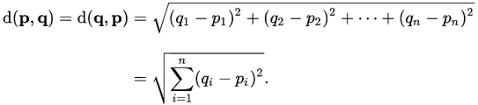

In [4]:
# calculate Euclidean distance between 2 data points
def euclidian(a, b):
    return np.linalg.norm(a - b)

### K-Means Clustering Algorithm
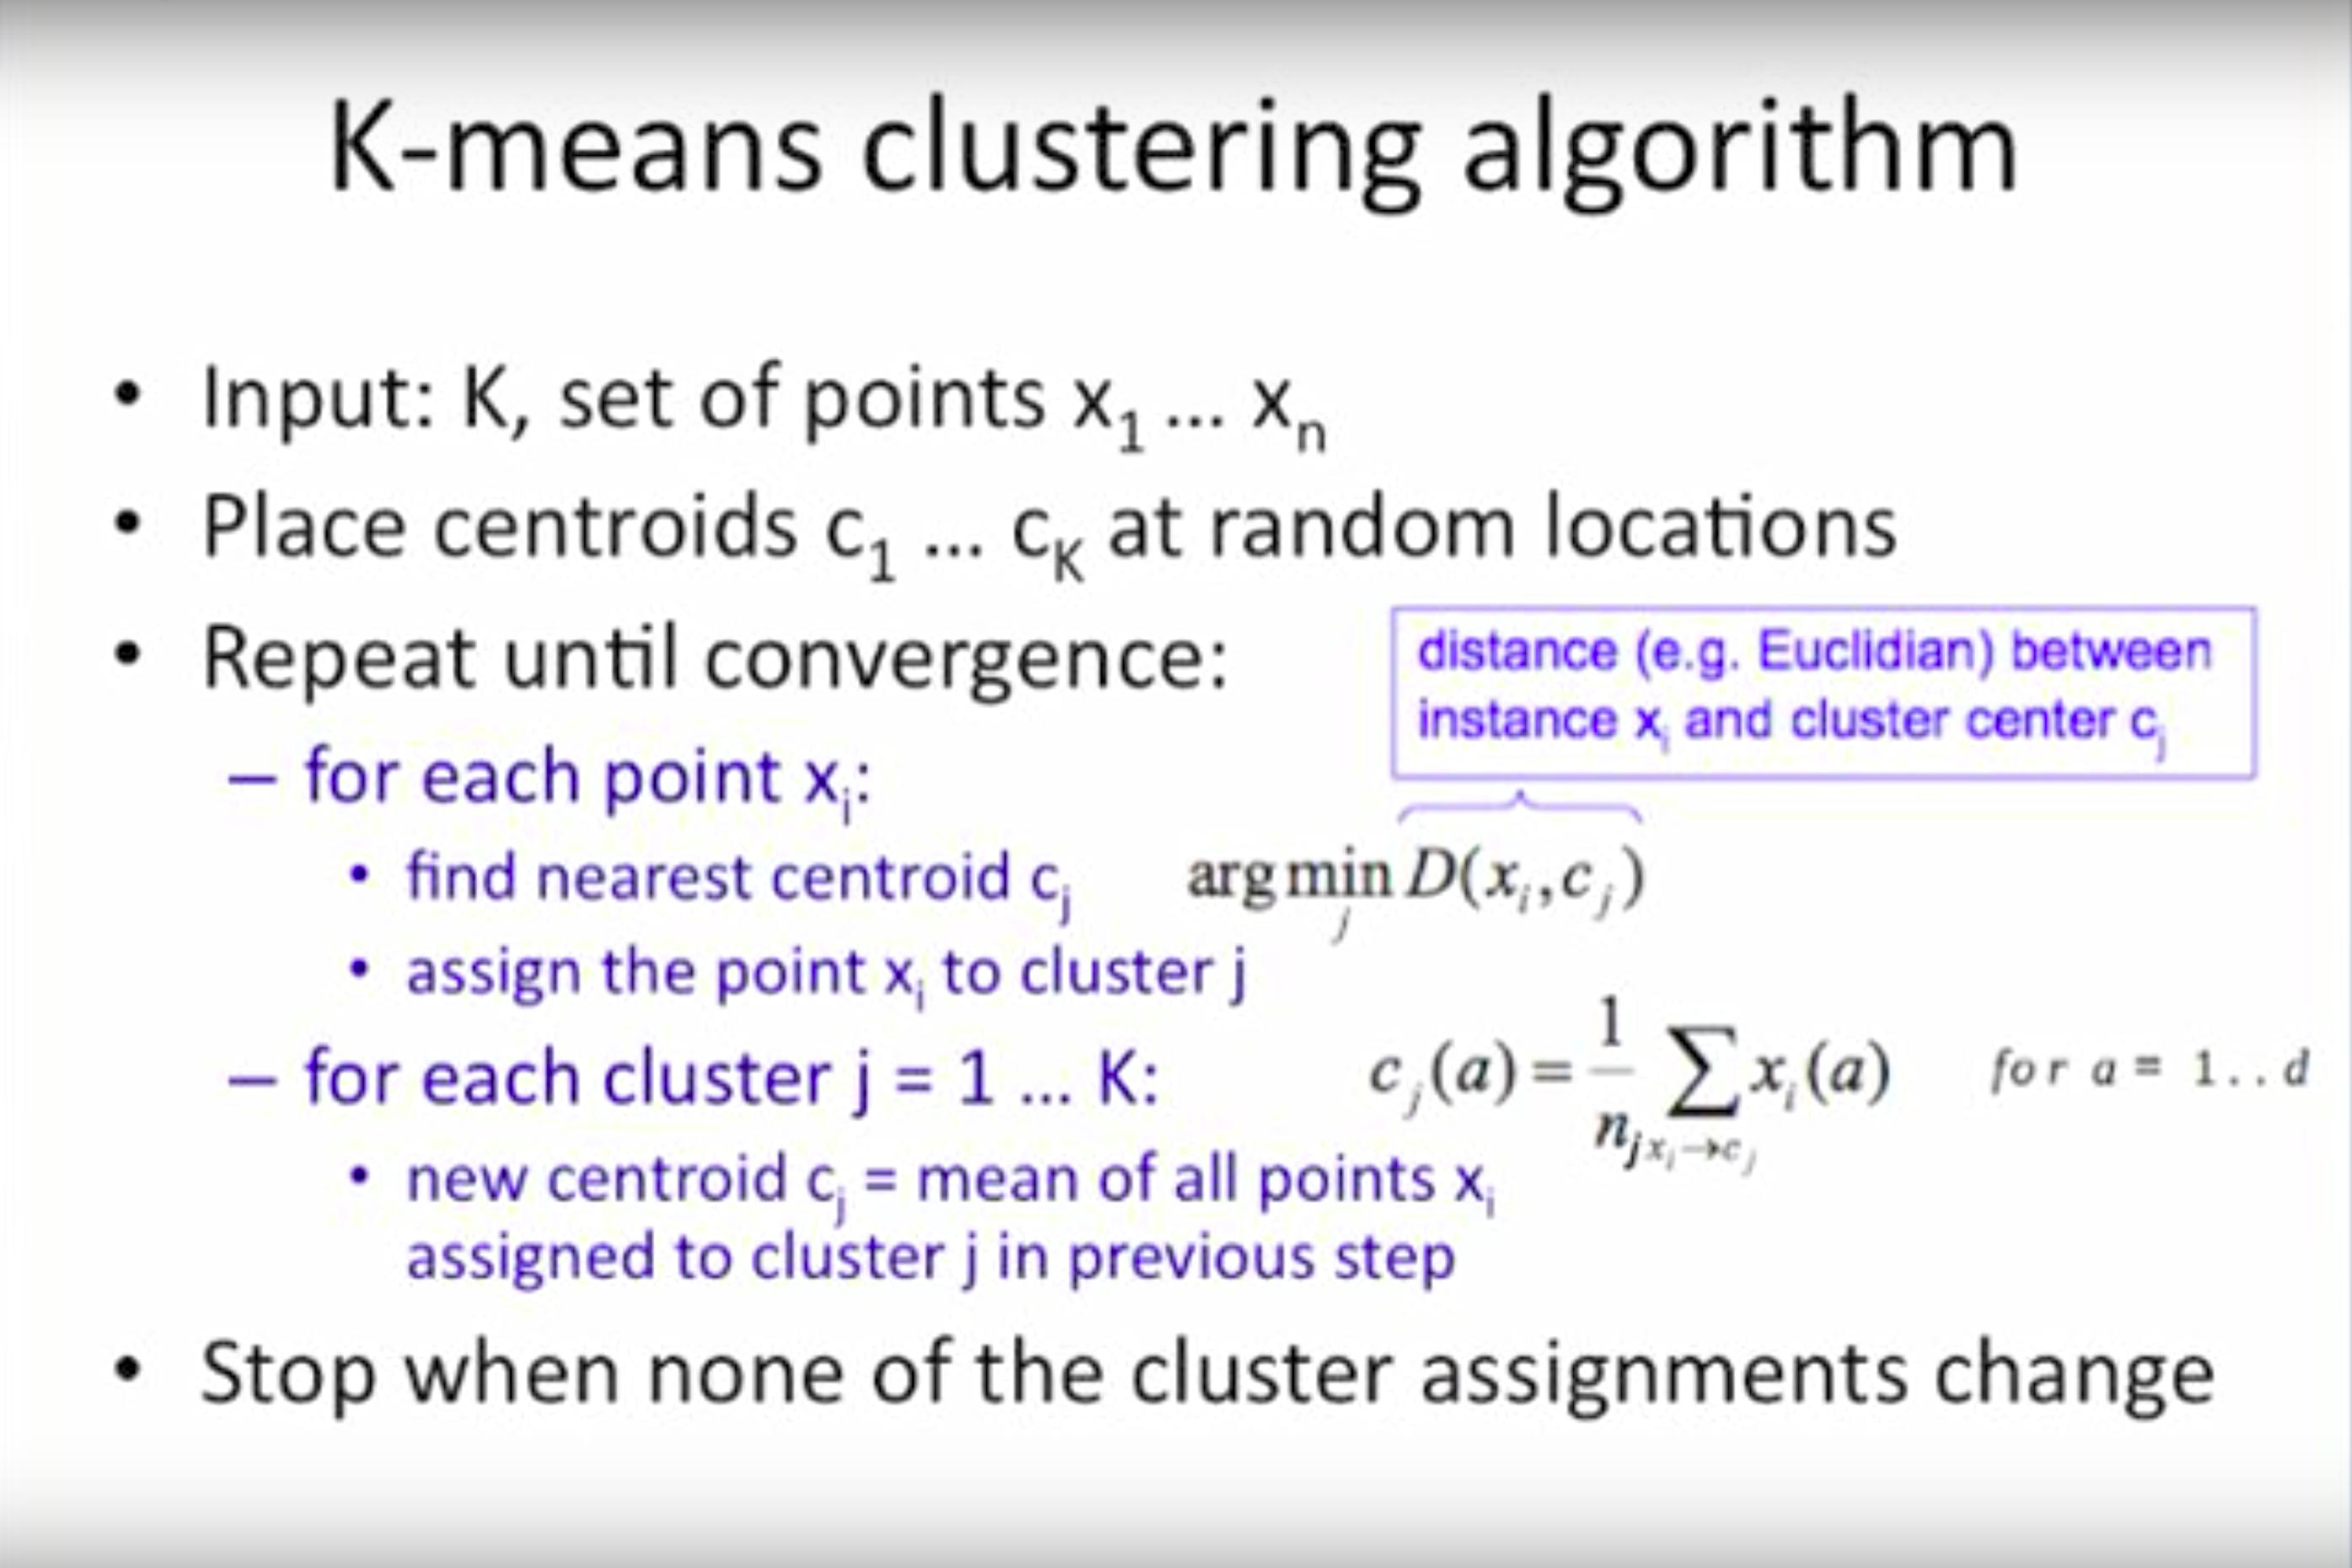

@parameters
* dataset (required
* k: number of clusters (required)
* episilon: minimum error to be used in the stop condition (optional, default == 0)
* distance: method is used to calculate the distance (optional, defalut == "euclidian)
* max_iter: maximum number of iterations foe the stop condition (optional, default == infinity)

@return
* new_centroids: the centroids
* history_centroids: the evolution history of centroids
* belongs_to: the membership vector of each instance with its respective centroid

In [7]:
# k-mean clustering algorithm
def kmeans(dataset, k, episilon=0, distance="euclidian", max_iter=float('inf')):

    # list to store past centroids
    history_centroids = []

    # set distance calculation method
    if distance == "euclidian":
        dist_method = euclidian

    # find the dimension of the dataset
    (num_instances, num_features) = dataset.shape

    # initialize centroids at random locations
    new_centroids = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(new_centroids)
    old_centroids = np.zeros(new_centroids.shape)

    # store clusters
    belongs_to = np.zeros((num_instances, 1))

    displacement = dist_method(new_centroids, old_centroids)
    iteration = 0

    # repeat until convergence
    while displacement > episilon and iteration < max_iter:

        # for each instance in the dataset
        for index_instance, instance in enumerate(dataset):
            distance_vector = np.zeros((k, 1))

            # for each centroid (k of them)
            for index_centroid, centroid in enumerate(new_centroids):
                distance_vector[index_centroid] = dist_method(instance, centroid)

            # find the closest centroid, and assign the instance to the cluster
            belongs_to[index_instance, 0] = np.argmin(distance_vector)

        tmp_centroids = np.zeros((k, num_features))

        # for each centoid (k of them)
        for index in range(new_centroids.shape[0]):

            # find all the instances that belong to this cluster
            close_instances = [i for i in range(len(belongs_to)) if belongs_to[i] == index]

            # find the mean of these close instances, which will be the new centroid
            tmp_centroids[index, :] = np.mean(dataset[close_instances], axis=0)

        # update centroids cache
        old_centroids = new_centroids
        new_centroids = tmp_centroids
        history_centroids.append(new_centroids)

        displacement = dist_method(new_centroids, old_centroids)
        iteration += 1

    return new_centroids, history_centroids, belongs_to

In [8]:
centroids, history_centroids, belongs_to = kmeans(dataset=dataset, k=2)
print("Newest centroids: \n%s" % centroids)

Newest centroids: 
[[ 1.58058247  1.56897412]
 [ 0.22331067  0.28960446]]


### Visualize the Final Clusters

In [9]:
def plot_final_clusters(dataset, history_centroids, belongs_to):
    # we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    # split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    # for each point in our dataset
    for index in range(dataset.shape[0]):
        # get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        # assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    # let's also log the history of centroids calculated via training
    history_points = []
    # for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        # print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

    plt.show()

centroids 1 [ 1.58058247  1.56897412]
centroids 1 [ 0.22331067  0.28960446]
centroids 2 [ 1.58058247  1.56897412]
centroids 2 [ 0.22331067  0.28960446]


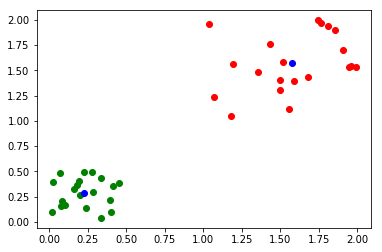

In [10]:
plot_final_clusters(dataset, history_centroids, belongs_to)

### Visualize the Evolution of Clusters

In [11]:
def plot_evolution(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)

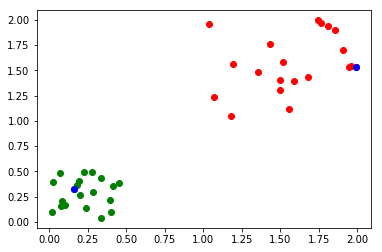

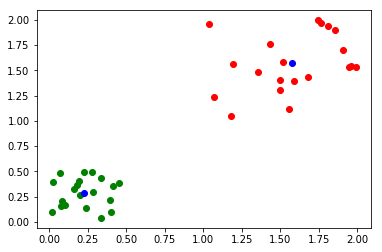

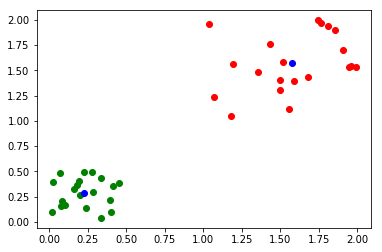

In [10]:
for item in history_centroids:
    plot_evolution(dataset, [item], belongs_to)